## Logistic Regression - What is it and Why do we need it?


1. Special use case of linear classifier
2. It outputs Probability of data point belonging to class
3. It can classify data into 2 classes
4. If we get a specific threshold, then it is class1 otherwise for another threshold it is class2

### Let us understand piece by piece as to how it works ?

### Coefficients(Weights)
<img src = './Xvalues.jpg'>
<img src = './datarow.jpg'>
<img src = './betacoefficients.jpg'>
<img src = './hypothesisfunclinreg.jpg'>

#### Our H(x) becomes Z and this becomes an input to our Sigmoid Function
<img src = './Z1.jpg'>
<img src = './z.jpg'>

 ### Sigmoid Function
 1. Sigmoid Function has a property of converting whats passed into it to a value between 0 and 1
 2. If value is above a threshold it is 1
 3. if value is below a threshold, it is 0
 4. threshold is generally 0.5
 
 <img src='./logmodel.jpg'>
 <img src = './sigmoidfunc.jpg'>

#### The Sigmoid Magic
1. The sigmoid function is magical in the sense it restricts the output between 0 and 1
2. THe output is a probability of function belonging to class 1
3. This means if our output from sigmoid>0.5, we predict class 1 else 0

#### Great so we found a way to convert our linear regression h(x) to a classification function by passing it through a sigmoid function as below
<img src = './sigmoidz.jpg'>

### Now what?
When we use above function and try to optimize weights beta1,beta2(also W1,W2..) etc to predict class we have a classification model

### We have new model function/hypothesis function/H(x) as below
<img src = './logisticcostfunction.jpg'>

### H(X) predicts values for us what do we do next??
### We try to create a cost function to find optimized weights for H(X)

### Let us first define cost function
<img src = './hxlog.jpg'>
<img src = './costfunc.jpg'>

#### Cost Function Final
<img src = './logisticcostfunctionfinal.jpg'>

### Now we perform Gradient Descent to find lowest point of cost function. In doing so the weights we get are the weights for correctly classifying the data
<img src = './gd.jpg'>
<img src = './gdmountain.jpg'>

### Finally with the right weights we get an equation for line like below which correctly sperates our data
<img src = './decboundary.jpg'>

### Interpreting Results from Logistic Regression Model

In [1]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)

In [2]:
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [13]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)

In [14]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\Arunabh\miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[110,  15],
       [ 27,  40]], dtype=int64)

In [16]:
len(y_test[y_test==0])

125

In [17]:
len(y_test[y_test==1])

67

In [18]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

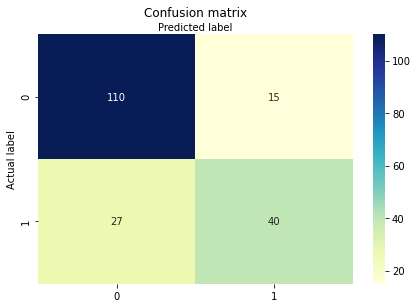

In [19]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<img src = './precisionrecall.jpg'>
<img src = './precisionrecall1.jpg'>

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7450980392156863
Recall: 0.6129032258064516


#### Coefficients of LogReg

In [20]:
pd.DataFrame(logreg.coef_,columns= X.columns)

,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,0.119667,-0.000221,0.084103,0.020351,0.03154,-0.011353,0.834523


### GLM
Generalized linear model (GLM) is a generalization of ordinary linear regression that allows for response variables that have error distribution models other than a normal distribution like Gaussian distribution.


#### Since Logistic Regression has class 1s and 0s it is a binomial distribution and not a Normal Distribution
<img src = './logisticglm.jpg'>

### GLM's use a link function to connect the linear model to a model that predicts for non normal distribution. our link function was Sigmoid Function

### Let's see how GLM works on our dataset

In [37]:
!pip install statsmodels

In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [22]:
formula = 'label ~ pregnant +glucose + bp + skin + insulin + bmi + pedigree + age'

In [23]:
model = smf.glm(formula = formula, data=pima, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  label   No. Observations:                  768
Model:                            GLM   Df Residuals:                      759
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -361.72
Date:                Tue, 18 Aug 2020   Deviance:                       723.45
Time:                        11:16:17   Pearson chi2:                     836.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.4047      0.717    -11.728      0.0

In [24]:
print(result.params)
print()
print("p-Values")
print(result.pvalues)
print()
print("Dependent variables")
print(result.model.endog_names)

Intercept   -8.404696
pregnant     0.123182
glucose      0.035164
bp          -0.013296
skin         0.000619
insulin     -0.001192
bmi          0.089701
pedigree     0.945180
age          0.014869
dtype: float64

p-Values
Intercept    9.161142e-32
pregnant     1.229640e-04
glucose      2.509097e-21
bp           1.107207e-02
skin         9.285152e-01
insulin      1.860652e-01
bmi          2.758937e-09
pedigree     1.579978e-03
age          1.111920e-01
dtype: float64

Dependent variables
label


### Softmax Regression
<img src = './softmax.jpeg'>